In [150]:
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

from matplotlib import pyplot as plt
import matplotlib.colors as colors

from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import metrics

In [151]:
y_target = np.load("labels.npz")['a']
X_features = np.load("features.npz")['a']

In [152]:
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.2, random_state = 42)

In [153]:
model_gbm = GradientBoostingClassifier(n_estimators=500,
                                      learning_rate=0.1,
                                      max_depth=3,
                                      n_iter_no_change=20,
                                      verbose=1)

model_gbm.fit(X_train, y_train)

      Iter       Train Loss   Remaining Time 
         1           1.3287            2.11m
         2           1.2925            2.13m
         3           1.2520            2.08m
         4           1.2155            2.07m
         5           1.1881            2.07m
         6           1.1554            2.05m
         7           1.1250            2.05m
         8           1.0989            2.06m
         9           1.0696            2.05m
        10           1.0519            2.06m
        20           0.8516            2.05m


GradientBoostingClassifier(n_estimators=500, n_iter_no_change=20, verbose=1)

In [154]:
model_gbm_score = model_gbm.score(X_train,y_train)*100
print(f'Training Accuracy is {round(model_gbm_score, 2)} %')
y_pred = model_gbm.predict(X_test)
gbm_test_acc = (metrics.accuracy_score(y_test, y_pred)*100)
print(f"Testing Accuracy is {round(gbm_test_acc, 2)} %")

Training Accuracy is 92.1 %
Testing Accuracy is 61.71 %


Confusion matrix for logistic regression: 


C:\Users\Watchtower\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


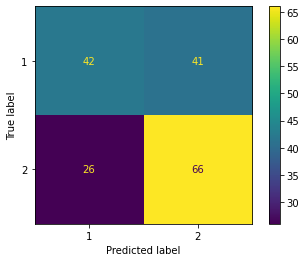

In [155]:
print("Confusion matrix for logistic regression: ")
plot_confusion_matrix(model_gbm, X_test, y_test)  
plt.show()

In [156]:
from sklearn.metrics import accuracy_score

print(metrics.classification_report(y_test, model_gbm.predict(X_test)))

print(accuracy_score(y_test, model_gbm.predict(X_test)))

              precision    recall  f1-score   support

           1       0.62      0.51      0.56        83
           2       0.62      0.72      0.66        92

    accuracy                           0.62       175
   macro avg       0.62      0.61      0.61       175
weighted avg       0.62      0.62      0.61       175

0.6171428571428571
